In [1]:
import os, shutil

In [2]:
original = '/home/james/Downloads/data'

In [2]:
base = '/home/james/Program/KerasLearning/data/dogs-vs-cats'
# base = 'G:/KerasLearning/data/dogs-vs-cats'

train_dir = os.path.join(base, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [3]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [4]:
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [6]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [7]:
from keras import layers
from keras import models
from keras import optimizers

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6898 - acc: 0.5325 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6609 - acc: 0.6025 - val_loss: 0.6468 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 10s 96ms/step - loss: 0.6219 - acc: 0.6645 - val_loss: 0.6136 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5804 - acc: 0.6960 - val_loss: 0.5911 - val_acc: 0.6900
Epoch 5/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5402 - acc: 0.7300 - val_loss: 0.5780 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 9s 95ms/step - loss: 0.5035 - acc: 0.7525 - val_loss: 0.5981 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4781 - acc: 0.7740 - val_loss: 0.6509 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 9s 94ms/ste

In [17]:
model.save('cats_and_dogs_small_1.h5')

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [19]:
# Using data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
from keras.preprocessing import image

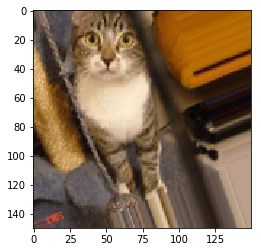

In [21]:
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    if i % 4 == 0:
        break
plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6916 - acc: 0.5169 - val_loss: 0.6890 - val_acc: 0.4962
Epoch 2/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6799 - acc: 0.5606 - val_loss: 0.7163 - val_acc: 0.5071
Epoch 3/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6604 - acc: 0.6038 - val_loss: 0.6323 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6461 - acc: 0.6231 - val_loss: 0.6186 - val_acc: 0.6456
Epoch 5/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6231 - acc: 0.6488 - val_loss: 0.6399 - val_acc: 0.6244
Epoch 6/100
100/100 [==============================] - 25s 251ms/step - loss: 0.6153 - acc: 0.6597 - val_loss: 0.5658 - val_acc: 0.7023
Epoch 7/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6015 - acc: 0.6772 -

100/100 [==============================] - 22s 224ms/step - loss: 0.3966 - acc: 0.8240 - val_loss: 0.4776 - val_acc: 0.7703
Epoch 61/100
100/100 [==============================] - 23s 231ms/step - loss: 0.4208 - acc: 0.8119 - val_loss: 0.4194 - val_acc: 0.8189
Epoch 62/100
100/100 [==============================] - 23s 227ms/step - loss: 0.3991 - acc: 0.8147 - val_loss: 0.4392 - val_acc: 0.8008
Epoch 63/100
100/100 [==============================] - 24s 235ms/step - loss: 0.4008 - acc: 0.8166 - val_loss: 0.5076 - val_acc: 0.7726
Epoch 64/100
100/100 [==============================] - 22s 225ms/step - loss: 0.3978 - acc: 0.8181 - val_loss: 0.4106 - val_acc: 0.8138
Epoch 65/100
100/100 [==============================] - 23s 226ms/step - loss: 0.3980 - acc: 0.8194 - val_loss: 0.4355 - val_acc: 0.7919
Epoch 66/100
100/100 [==============================] - 23s 225ms/step - loss: 0.3968 - acc: 0.8247 - val_loss: 0.5276 - val_acc: 0.7506
Epoch 67/100
100/100 [==============================] 

In [24]:
model.save('cats_and_dogs_small_2.h5')

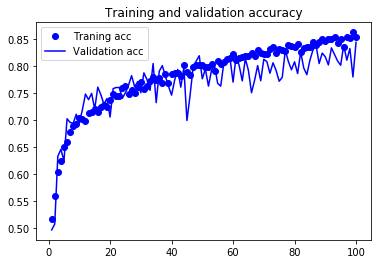

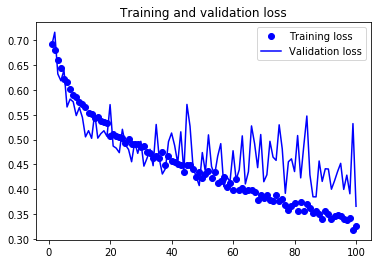

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()